# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

import statsmodels.formula.api as smf

In [19]:
df = sns.load_dataset("tips")

df['net_bill'] = df['total_bill'] - df['tip']
df['tip_pct'] = df['tip'] / df['net_bill']
df = df[df['tip_pct'] <= .5]

<AxesSubplot: xlabel='net_bill', ylabel='tip_pct'>

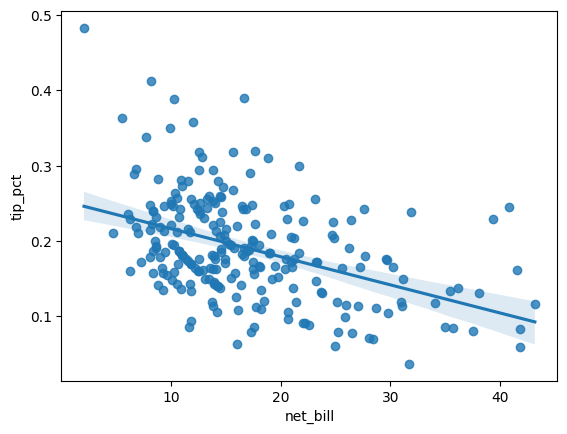

In [25]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = df)

In [21]:
reg = smf.ols("tip_pct ~ net_bill", data=df)
reg = reg.fit()

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.31e-12
Time:                        12:05:00   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.0

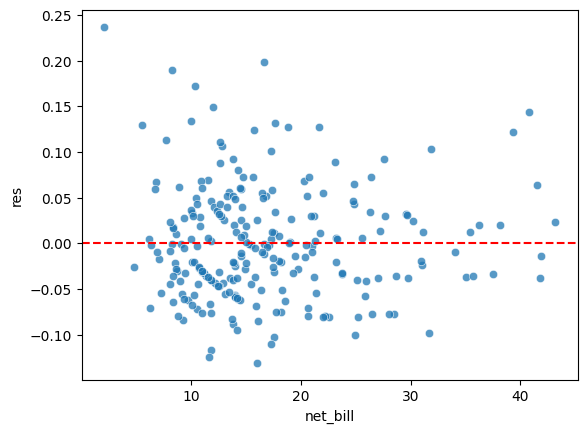

In [22]:
print(reg.summary())

df['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.03e-14
Time:                        12:07:04   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.023  

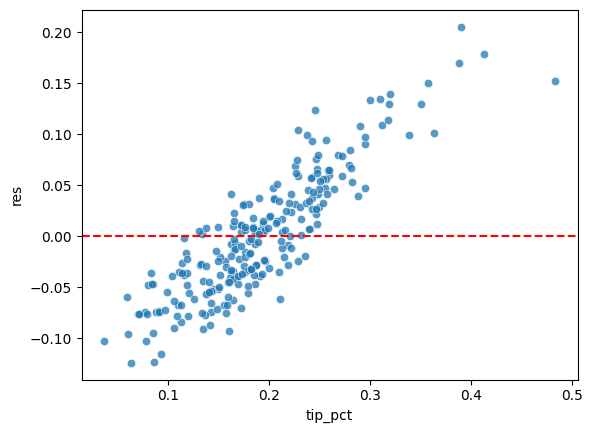

In [26]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'tip_pct', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.09e-12
Time:                        12:08:42   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.29

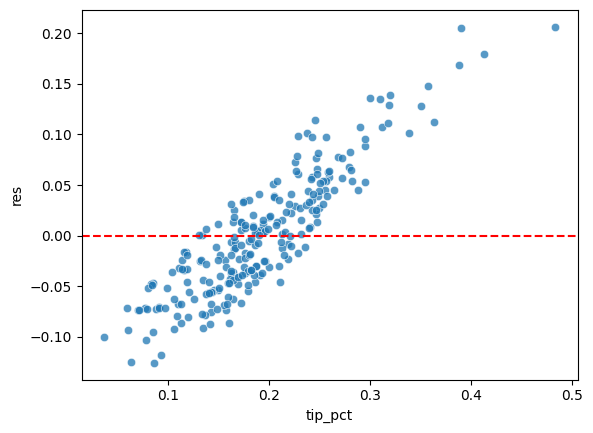

In [28]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill, 2)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'tip_pct', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           5.70e-15
Time:                        12:20:03   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.0

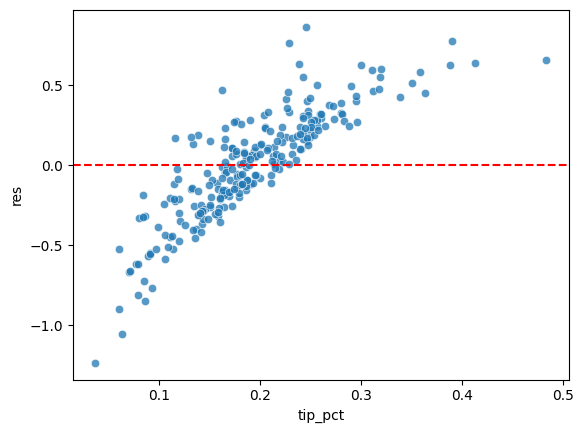

In [36]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'tip_pct', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [37]:
df['pred'] = np.exp(reg.fittedvalues)

df[['pred', 'tip_pct']].corr().iloc[0,1]**2

0.20051484016183768

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     71.57
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           2.65e-15
Time:                        12:20:09   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131  

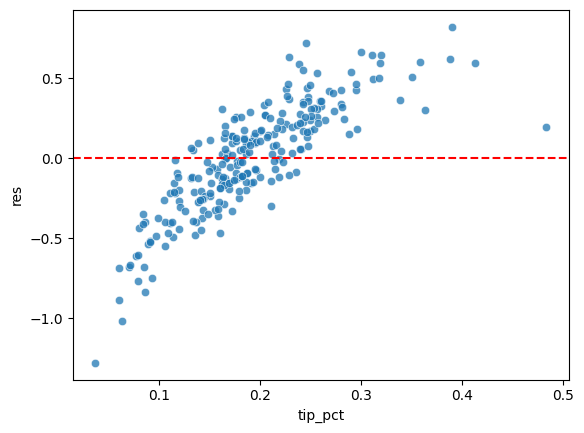

In [38]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'tip_pct', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [39]:
df['pred'] = np.exp(reg.fittedvalues)

df[['pred', 'tip_pct']].corr().iloc[0,1]**2

0.22914336517022676

###  6. qual modelo resultou no melhor ajuste?

<div style="background: #EEEEF4; padding: 15px 20px; border-radius: 5px; margin-top: 20px">
    <p style="font-size: 11px; color: #666; font-weight: bold">Resposta</p>
    <p>O melhor modelo foi o último, onde ajustamos tanto o X quanto o Y com Log (R2 de 0.229)</p>
</div>